<a href="https://colab.research.google.com/github/ozanryo/air-kerma-hvl-prediction-AI/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Melakukan Install Pydicom**
---

In [ ]:
pip install pydicom

     |████████████████████████████████| 1.9MB 10.9MB/s 


# **Import Library**
---

In [ ]:
import pydicom as dicom
import os

#Preprocessing Dataset dan Membangun Neural Network
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from skimage.feature import greycomatrix, greycoprops

#Pengukuran Performa Machine Learning
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.utils import plot_model
from sklearn.utils import shuffle

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# **Membuat Fungsi**
---

**Membuat Fungsi Input dan Output**

In [ ]:
def Input(Data):
    X = Data.iloc[:, 0:3].values
    
    #Standard Scaler()
    sc = StandardScaler()
    X[:, 0:3] = sc.fit_transform(X[:, 0:3])
    X[:, 0:3] = sc.transform(X[:, 0:3])
    return X

In [ ]:
def Labels(Data):
    y = Data.iloc[:, 4:7].values
    
    labelencoder_y_1 = LabelEncoder()
    y[:,0] = labelencoder_y_1.fit_transform(y[:,0])
    labelencoder_y_3 = LabelEncoder()
    y[:,1] = labelencoder_y_3.fit_transform(y[:,1])
    
    ct1 = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [0, 1])], 
                               remainder='passthrough')
    
    y = ct1.fit_transform(y) 
    return y

**Membuat Fungsi Pembuat Model ANN**

In [ ]:
def neural_net(n_layers, inputs, units, activation, output_activation, lr, kernel_init):
    if isinstance(units, list):
        assert len(units) == n_layers
    else:
        units = [units] * n_layers
        
    classifier = Sequential()
 
    # Adds first hidden layer with input_dim parameter
    classifier.add(Dense(units = units[0],
                         input_dim = inputs,
                         activation = activation,
                         kernel_initializer = 'glorot_uniform',
                         name = 'h1'))
    
    # Adds remaining hidden layers
    for i in range(2, n_layers + 1):
        classifier.add(Dense(units = units[i-1], 
                        activation = activation, 
                        kernel_initializer = kernel_init, 
                        name = 'h{}'.format(i)))
    
    # Adds output layer
    classifier.add(Dense(units = y_test_folds.shape[1], 
                         activation = output_activation, 
                         kernel_initializer='glorot_uniform', name='o'))
 
    # Compiles the model
    classifier.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy', 'mean_squared_error'])
 
    return classifier

**Membuat Fungsi Plotting**

In [ ]:
def plot_result(model):
    # Plot Loss dari Model
    plot_loss = plt.plot(model.history['loss'], label='Train')
    plot_loss = plt.plot(model.history['val_loss'], label='Validation')
    plot_loss = plt.title('Mean Absolute Error')
    plot_loss = plt.grid(True)
    plot_loss = plt.ylabel('Loss Value')
    plot_loss = plt.xlabel('No. epoch')
    plot_loss = plt.legend(loc="upper right")
    plot_loss = plt.show()

    # Plot Accuracy dari Model
    plot_acc = plt.plot(model.history['accuracy'], label='Train')
    plot_acc = plt.plot(model.history['val_accuracy'], label='Validation')
    plot_acc = plt.title('Accuracy')
    plot_acc = plt.grid(True)
    plot_acc = plt.ylabel('Accuracy Value')
    plot_acc = plt.xlabel('No. epoch')
    plot_acc = plt.legend(loc="upper right")
    plot_acc = plt.show()

    # Plot Mean Squared Error dari Model
    plot_MSE = plt.plot(model.history['mean_squared_error'], label='MSE Train')
    plot_MSE = plt.plot(model.history['val_mean_squared_error'], label='MSE Validation')
    plot_MSE = plt.title('Mean Squared Error')
    plot_MSE = plt.grid(True)
    plot_MSE = plt.ylabel('MSE value')
    plot_MSE = plt.xlabel('No. epoch')
    plot_MSE = plt.legend(loc="upper left")
    plot_MSE = plt.show()
    
    return plot_loss, plot_acc, plot_MSE

**Membuat Fungsi Pengukur Performa Machine Learning**

In [ ]:
def Precision_Classification_Kerma(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    ## Prediction on Kerma
    y_pred_Kerma = y_pred[:, 0:3]
    y_pred_Kerma = np.argmax(y_pred_Kerma, axis=1)
     
    ## Take a test on Kerma
    y_test_Kerma = y_test[:, 0:3]
    y_test_Kerma = np.argmax(y_test_Kerma, axis=1)
    
    Precision = precision_score(y_test_Kerma, y_pred_Kerma, average='micro')
    return Precision

def Precision_Classification_HVL(model, X_test, y_test):
    y_pred = model.predict(X_test)
     
    ## Prediction on HVL
    y_pred_HVL = y_pred[:, 3:6]
    y_pred_HVL = np.argmax(y_pred_HVL, axis=1)
     
    ## Take a test on HVL
    y_test_HVL = y_test[:, 3:6]
    y_test_HVL = np.argmax(y_test_HVL, axis=1)
    
    Precision = precision_score(y_test_HVL, y_pred_HVL, average='micro')
    return Precision

def Recall_Classification_Kerma(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    ## Prediction on Kerma
    y_pred_Kerma = y_pred[:, 0:3]
    y_pred_Kerma = np.argmax(y_pred_Kerma, axis=1)
     
    ## Take a test on Kerma
    y_test_Kerma = y_test[:, 0:3]
    y_test_Kerma = np.argmax(y_test_Kerma, axis=1)
    
    Recall = recall_score(y_test_Kerma, y_pred_Kerma, average='micro')
    return Recall

def Recall_Classification_HVL(model, X_test, y_test):
    y_pred = model.predict(X_test)
     
    ## Prediction on HVL
    y_pred_HVL = y_pred[:, 3:6]
    y_pred_HVL = np.argmax(y_pred_HVL, axis=1)
     
    ## Take a test on HVL
    y_test_HVL = y_test[:, 3:6]
    y_test_HVL = np.argmax(y_test_HVL, axis=1)
    
    Recall = recall_score(y_test_HVL, y_pred_HVL, average='micro')
    return Recall

def f1Score_Classification_Kerma(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    ## Prediction on Kerma
    y_pred_Kerma = y_pred[:, 0:3]
    y_pred_Kerma = np.argmax(y_pred_Kerma, axis=1)
     
    ## Take a test on Kerma
    y_test_Kerma = y_test[:, 0:3]
    y_test_Kerma = np.argmax(y_test_Kerma, axis=1)
    
    f1 = f1_score(y_test_Kerma, y_pred_Kerma, average='micro')
    return f1

def f1Score_Classification_HVL(model, X_test, y_test):
    y_pred = model.predict(X_test)
     
    ## Prediction on HVL
    y_pred_HVL = y_pred[:, 3:6]
    y_pred_HVL = np.argmax(y_pred_HVL, axis=1)
     
    ## Take a test on HVL
    y_test_HVL = y_test[:, 3:6]
    y_test_HVL = np.argmax(y_test_HVL, axis=1)
    
    f1 = f1_score(y_test_HVL, y_pred_HVL, average='micro')
    return f1

def Accuracy_Classification_Kerma(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    ## Prediction on Kerma
    y_pred_Kerma = y_pred[:, 0:3]
    y_pred_Kerma = np.argmax(y_pred_Kerma, axis=1)
     
    ## Take a test on Kerma
    y_test_Kerma = y_test[:, 0:3]
    y_test_Kerma = np.argmax(y_test_Kerma, axis=1)
    
    acc = accuracy_score(y_test_Kerma, y_pred_Kerma)
    return acc

def Accuracy_Classification_HVL(model, X_test, y_test):
    y_pred = model.predict(X_test)
     
    ## Prediction on HVL
    y_pred_HVL = y_pred[:, 3:6]
    y_pred_HVL = np.argmax(y_pred_HVL, axis=1)
     
    ## Take a test on HVL
    y_test_HVL = y_test[:, 3:6]
    y_test_HVL = np.argmax(y_test_HVL, axis=1)
    
    acc = accuracy_score(y_test_HVL, y_pred_HVL)
    return acc

**Plot Confusion Matrix**

In [ ]:
def Conf_Mat(X_test_folds, y_test_folds):
  import matplotlib.pyplot as plt
  from sklearn.metrics import ConfusionMatrixDisplay
  from sklearn.utils.multiclass import unique_labels

  y_pred = NN.predict(X_test_folds)
    
  ## Prediction on Kerma
  y_pred_Kerma = y_pred[:, 0:3]
  y_pred_Kerma = np.argmax(y_pred_Kerma, axis=1)
     
  ## Take a test on Kerma
  y_test_Kerma = y_test_folds[:, 0:3]
  y_test_Kerma = np.argmax(y_test_Kerma, axis=1)

  ## Prediction on HVL
  y_pred_HVL = y_pred[:, 3:6]
  y_pred_HVL = np.argmax(y_pred_HVL, axis=1)
     
  ## Take a test on HVL
  y_test_HVL = y_test_folds[:, 3:6]
  y_test_HVL = np.argmax(y_test_HVL, axis=1)

  titles_options = [("Confusion Matrix on Air Kerma Predictions", y_pred_Kerma, y_test_Kerma, 'Air Kerma A', 'Air Kerma B', 'Air Kerma C'),
                    ("Confusion Matrix on Half Value Layer Predictions", y_pred_HVL, y_test_HVL, 'HVL A', 'HVL B', 'HVL C')]
      
  for title, pred_y, test_y, A, B, C in titles_options:
      conf_mat = metrics.confusion_matrix(pred_y, test_y)
      disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                                    display_labels=[(A), (B), (C)])
      
      disp = disp.plot(include_values=True,
                       cmap=plt.cm.Blues)
      
      disp.ax_.set_title(title)
      plt.show()

In [ ]:
def Measure_Conf_Mat(X_test_folds, y_test_folds):
  from sklearn.metrics import classification_report
  y_pred = NN.predict(X_test_folds)
    
  ## Prediction on Kerma
  y_pred_Kerma = y_pred[:, 0:3]
  y_pred_Kerma = np.argmax(y_pred_Kerma, axis=1)
     
  ## Take a test on Kerma
  y_test_Kerma = y_test_folds[:, 0:3]
  y_test_Kerma = np.argmax(y_test_Kerma, axis=1)

  ## Prediction on HVL
  y_pred_HVL = y_pred[:, 3:6]
  y_pred_HVL = np.argmax(y_pred_HVL, axis=1)
     
  ## Take a test on HVL
  y_test_HVL = y_test_folds[:, 3:6]
  y_test_HVL = np.argmax(y_test_HVL, axis=1)

  target = [(['Air Kerma A', 'Air Kerma B', 'Air Kerma C'], y_pred_Kerma, y_test_Kerma),
            (['HVL A', 'HVL B', 'HVL C'], y_pred_HVL, y_test_HVL)]
  
  for target_names, pred_y, true_y in target:
    print(classification_report(true_y, pred_y, target_names=target_names))


**Melakukan Prediksi Data Image**

In [ ]:
def Prediction_Kerma(Prediction_result):
  if Prediction_result == 0:
    print('The Prediction Kerma is on A')
  elif Prediction_result == 1:
    print('The Prediction Kerma is on B')
  elif Prediction_result == 2:
    print('The Prediction Kerma is on C')

def Prediction_HVL(Prediction_result):
  if Prediction_result == 0:
    print('The Prediction HVL is on A')
  elif Prediction_result == 1:
    print('The Prediction HVL is on B')
  elif Prediction_result == 2:
    print('The Prediction HVL is on C')

In [ ]:
def False_Prediction_Kerma(False_1, False_2, real_kVp, False_kVp_1, False_kVp_2):
  if False_1 == np.argmax(real_kVp):
    print('False Prediction on real Kerma detected')
  elif False_1 == np.argmax(False_kVp_1):
    print('Prediction on another Kerma is detected')
  else :
    print('Kerma Prediction is accurate')
  
  if False_2 == np.argmax(real_kVp):
    print('False Prediction on real Kerma detected')
  elif False_2 == np.argmax(False_kVp_2):
    print('Prediction on another Kerma is detected')
  else :
    print('Kerma Prediction is accurate')

def False_Prediction_HVL(False_1, False_2, real_kVp, False_kVp_1, False_kVp_2):
  if False_1 == np.argmax(real_kVp):
    print('False Prediction on real HVL detected')
  elif False_1 == np.argmax(False_kVp_1):
    print('Prediction on another HVL is detected')
  else :
    print('HVL Prediction is accurate')
  
  if False_2 == np.argmax(real_kVp):
    print('False Prediction on real HVL detected')
  elif False_2 == np.argmax(False_kVp_2):
    print('Prediction on another HVL is detected')
  else :
    print('HVL Prediction is accurate')

**Membuat fungsi untuk Pengambilan Gambar dengan Koordinat utama pada tengah Image**

In [ ]:
def crop_center(img, cropx, cropy):
  y,x = img.shape
  startx = x//2-(cropx//2)
  starty = y//2-(cropy//2)    
  return img[starty:starty+cropy,startx:startx+cropx]

**Menggandakan Array**

In [ ]:
def multiply_array(arr, n):
    result = np.zeros(shape=(n*len(arr), 1))
    idx = 0
    for _ in range(n):
      for element in arr:
        result[idx, 0] = int(element)
        idx += 1
    return result

**Menggandakan Data**

In [ ]:
def multiply_data_kVp(arr, n):
  count = n

  a = np.asarray(arr[:, 0])
  b = np.asarray(arr[:, 1])
  c = np.asarray(arr[:, 2])

  a = multiply_array(a, count)
  b = multiply_array(b, count)
  c = multiply_array(c, count)

  result = np.append(a, b, axis=1)
  result = np.append(result, c, axis=1)
  return result

# **Membuat Fungsi Pembaca Dicom pada Suatu Direktori**

In [ ]:
def Read_Dicom(PathDicom):
  lstFileDicom = [] #Create an Empty List
  for dirName, subdirlist, filelist in os.walk(PathDicom):
    for filename in filelist:
      if '.dcm' in filename.lower():
        lstFileDicom.append(os.path.join(dirName, filename))
  
  # Get ref file
  RefDs = dicom.read_file(lstFileDicom[0])
  
  # Load dimensions based on the number of rows, columns, and slices (along the Z axis)
  ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFileDicom))
  
  # Load spacing values (in mm)
  ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
  
  # The array is sized based on 'ConstPixelDims'
  ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
  
  # loop through all the DICOM files
  for filenameDCM in lstFileDicom:
      # read the file
      ds = dicom.read_file(filenameDCM)
      
      # store the raw image data
      ArrayDicom[:, :,lstFileDicom.index(filenameDCM)] = ds.pixel_array

  return ArrayDicom

**Melakukan Pemeriksaan GLCM pada suatu Kumpulan File Dicom**

In [ ]:
def Check_GLCM(Dicom_file):
  dissimilar = []
  energi = []
  contrast = []

  dcm_files = Dicom_file.shape[2]

  for i in range(dcm_files):
    img = Dicom_file[:, :, i]
    img = crop_center(img, 10, 10)

    glcm = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], 2048, symmetric=True, normed=True)

    dissimilar.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    energi.append(greycoprops(glcm, 'energy')[0, 0])
    contrast.append(greycoprops(glcm, 'contrast')[0, 0])

  diss = np.asarray(dissimilar)
  en = np.asarray(energi)
  con = np.asarray(contrast)

  Dataset = [diss, energi, con]
  Dataset = np.asarray(Dataset)
  Dataset = np.transpose(Dataset)

  return Dataset

**Membuat Fungsi Prediksi pada Direktori 80 kVp**

In [ ]:
def Predict_Group(pred_material, Dicom_file, PathDicom):

  dcm_files = Dicom_file.shape[2]
  sc = StandardScaler()
  pred_material = sc.fit_transform(pred_material)
  pred_material = sc.transform(pred_material)

  y_pred_group = NN.predict(pred_material)

  lstFileDicom = [] #Create an Empty List
  for dirName, subdirlist, filelist in os.walk(PathDicom):
    for filename in filelist:
      if '.dcm' in filename.lower():
        lstFileDicom.append(os.path.join(dirName, filename))

  for j in range(dcm_files):
    y_pred_kerma_grup = np.argmax(y_pred_group[j, 0:3])
    y_pred_HVL_grup = np.argmax(y_pred_group[j, 3:6])

    A = np.asarray(lstFileDicom)

    print('-------------------------------------------------------------------------')
    print('File :', A[j])
    Prediction_Kerma(y_pred_kerma_grup)
    Prediction_HVL(y_pred_HVL_grup)
    print('-------------------------------------------------------------------------')

# **Membuka Dataset untuk diolah**
---

In [ ]:
path = '/content/drive/MyDrive/Data/Dataset/New Data/Dataset_Update_4fitur.xlsx'

dataset = pd.read_excel(path, sheet_name='Main Shuffle')

In [ ]:
X = Input(dataset)
y = Labels(dataset)

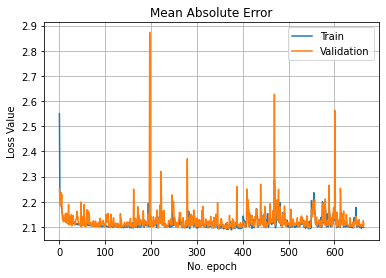

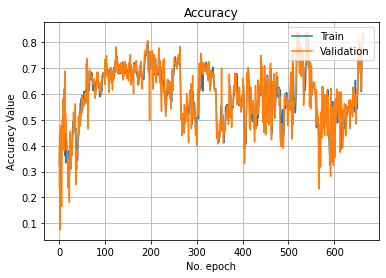

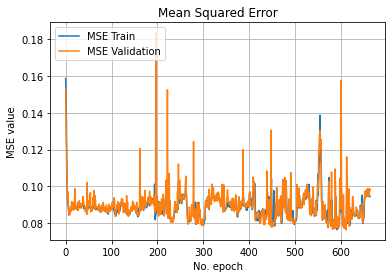

334/334 [==============================] - 0s 1ms/step - loss: 2.0963 - accuracy: 0.8148 - mean_squared_error: 0.0964


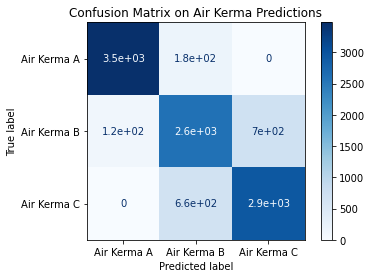

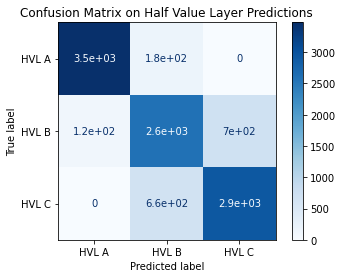

              precision    recall  f1-score   support

 Air Kerma A       0.95      0.97      0.96      3599
 Air Kerma B       0.76      0.76      0.76      3444
 Air Kerma C       0.82      0.81      0.81      3645

    accuracy                           0.84     10688
   macro avg       0.84      0.84      0.84     10688
weighted avg       0.84      0.84      0.84     10688

              precision    recall  f1-score   support

       HVL A       0.95      0.97      0.96      3599
       HVL B       0.76      0.76      0.76      3444
       HVL C       0.82      0.81      0.81      3645

    accuracy                           0.84     10688
   macro avg       0.84      0.84      0.84     10688
weighted avg       0.84      0.84      0.84     10688



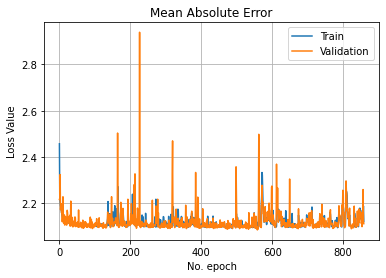

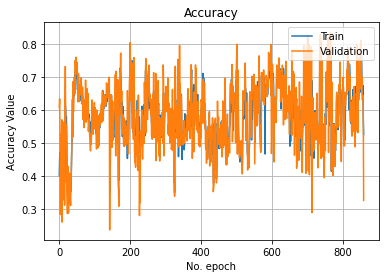

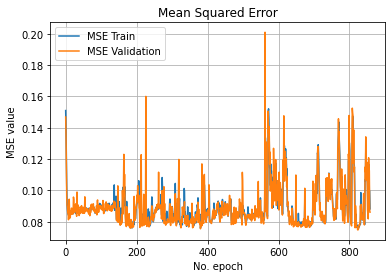

334/334 [==============================] - 1s 2ms/step - loss: 2.1246 - accuracy: 0.3256 - mean_squared_error: 0.0877


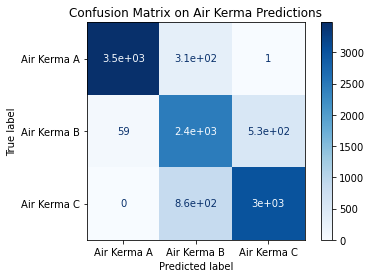

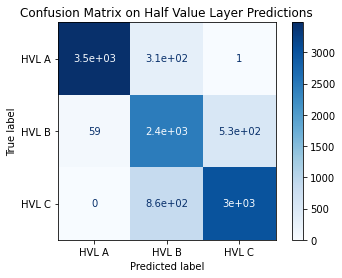

              precision    recall  f1-score   support

 Air Kerma A       0.92      0.98      0.95      3537
 Air Kerma B       0.81      0.68      0.74      3611
 Air Kerma C       0.78      0.85      0.81      3540

    accuracy                           0.84     10688
   macro avg       0.83      0.84      0.83     10688
weighted avg       0.83      0.84      0.83     10688

              precision    recall  f1-score   support

       HVL A       0.92      0.98      0.95      3537
       HVL B       0.81      0.68      0.74      3611
       HVL C       0.78      0.85      0.81      3540

    accuracy                           0.84     10688
   macro avg       0.83      0.84      0.83     10688
weighted avg       0.83      0.84      0.83     10688



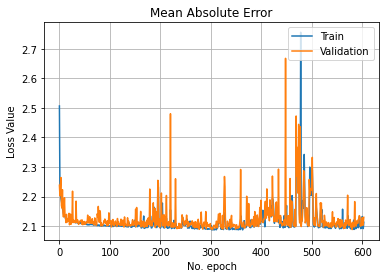

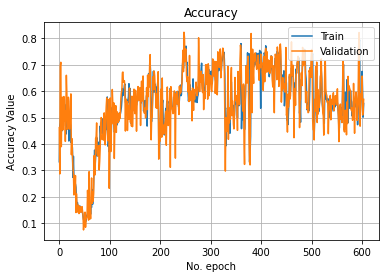

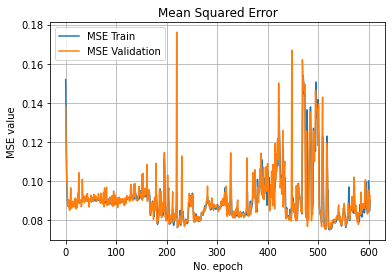

334/334 [==============================] - 0s 1ms/step - loss: 2.1140 - accuracy: 0.5798 - mean_squared_error: 0.0901


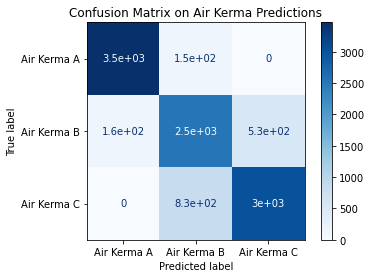

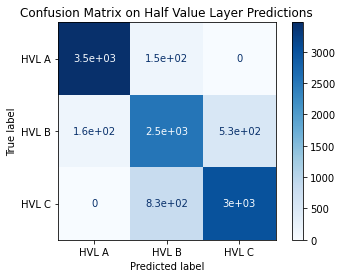

              precision    recall  f1-score   support

 Air Kerma A       0.96      0.96      0.96      3624
 Air Kerma B       0.79      0.72      0.75      3524
 Air Kerma C       0.78      0.85      0.82      3540

    accuracy                           0.84     10688
   macro avg       0.84      0.84      0.84     10688
weighted avg       0.84      0.84      0.84     10688

              precision    recall  f1-score   support

       HVL A       0.96      0.96      0.96      3624
       HVL B       0.79      0.72      0.75      3524
       HVL C       0.78      0.85      0.82      3540

    accuracy                           0.84     10688
   macro avg       0.84      0.84      0.84     10688
weighted avg       0.84      0.84      0.84     10688



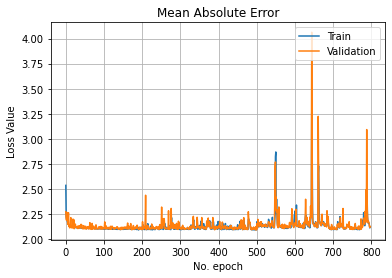

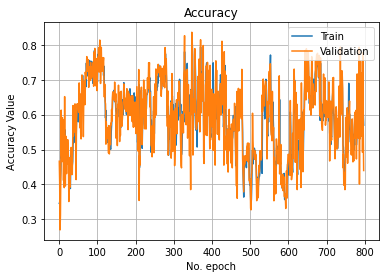

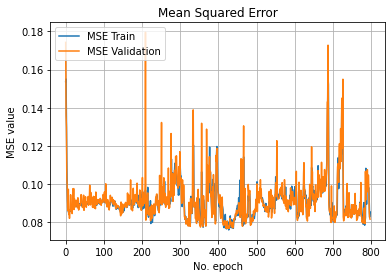

334/334 [==============================] - 0s 1ms/step - loss: 2.1344 - accuracy: 0.4377 - mean_squared_error: 0.0825


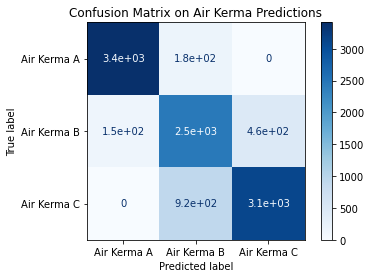

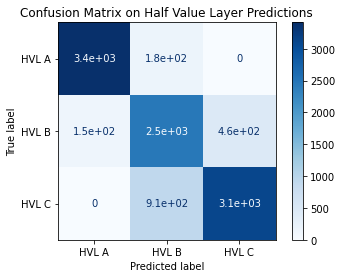

              precision    recall  f1-score   support

 Air Kerma A       0.95      0.96      0.95      3563
 Air Kerma B       0.80      0.69      0.74      3552
 Air Kerma C       0.77      0.87      0.82      3573

    accuracy                           0.84     10688
   macro avg       0.84      0.84      0.84     10688
weighted avg       0.84      0.84      0.84     10688

              precision    recall  f1-score   support

       HVL A       0.95      0.96      0.95      3563
       HVL B       0.80      0.69      0.74      3552
       HVL C       0.77      0.87      0.82      3573

    accuracy                           0.84     10688
   macro avg       0.84      0.84      0.84     10688
weighted avg       0.84      0.84      0.84     10688



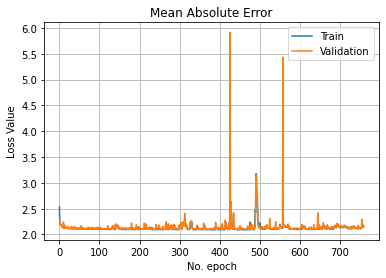

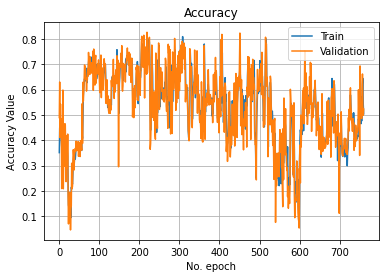

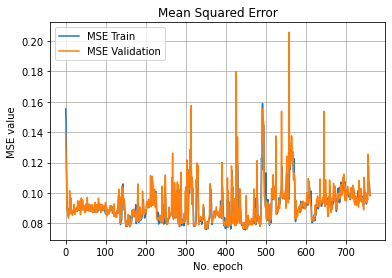

334/334 [==============================] - 0s 1ms/step - loss: 2.1532 - accuracy: 0.5282 - mean_squared_error: 0.0990


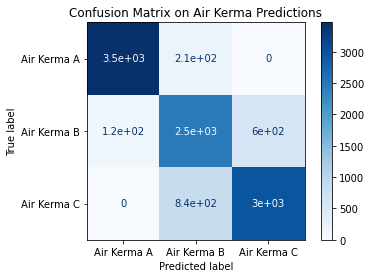

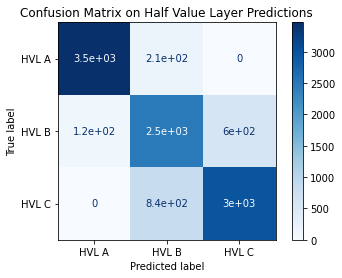

              precision    recall  f1-score   support

 Air Kerma A       0.94      0.97      0.95      3593
 Air Kerma B       0.77      0.70      0.74      3525
 Air Kerma C       0.78      0.83      0.81      3570

    accuracy                           0.83     10688
   macro avg       0.83      0.83      0.83     10688
weighted avg       0.83      0.83      0.83     10688

              precision    recall  f1-score   support

       HVL A       0.94      0.97      0.95      3593
       HVL B       0.77      0.70      0.74      3525
       HVL C       0.78      0.83      0.81      3570

    accuracy                           0.83     10688
   macro avg       0.83      0.83      0.83     10688
weighted avg       0.83      0.83      0.83     10688



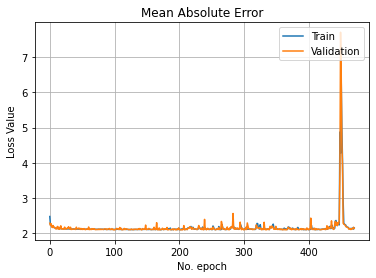

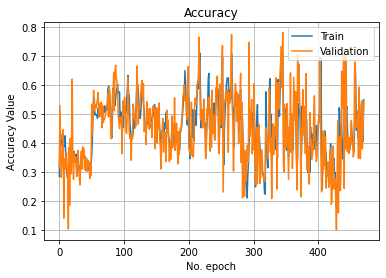

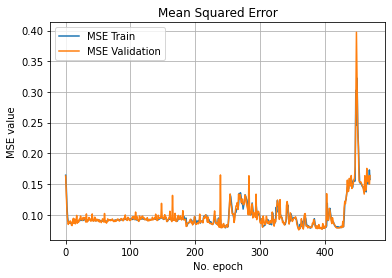

334/334 [==============================] - 0s 1ms/step - loss: 2.1156 - accuracy: 0.5478 - mean_squared_error: 0.1636


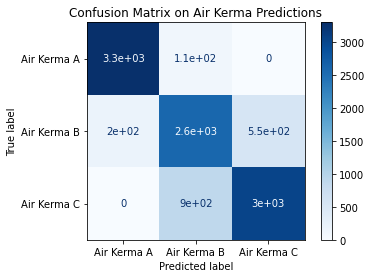

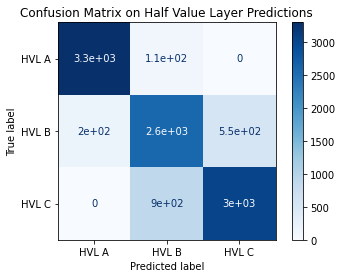

              precision    recall  f1-score   support

 Air Kerma A       0.97      0.94      0.96      3496
 Air Kerma B       0.78      0.72      0.75      3606
 Air Kerma C       0.77      0.85      0.81      3585

    accuracy                           0.84     10687
   macro avg       0.84      0.84      0.84     10687
weighted avg       0.84      0.84      0.84     10687

              precision    recall  f1-score   support

       HVL A       0.97      0.94      0.96      3496
       HVL B       0.78      0.72      0.75      3606
       HVL C       0.77      0.85      0.81      3585

    accuracy                           0.84     10687
   macro avg       0.84      0.84      0.84     10687
weighted avg       0.84      0.84      0.84     10687



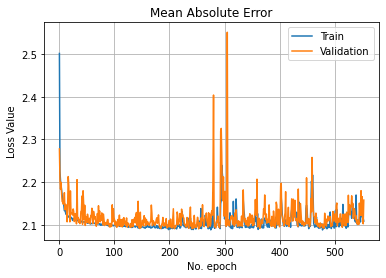

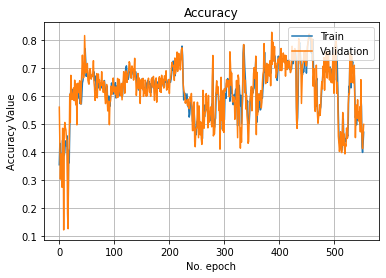

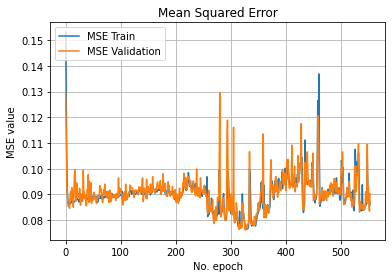

334/334 [==============================] - 0s 1ms/step - loss: 2.1811 - accuracy: 0.4876 - mean_squared_error: 0.0933


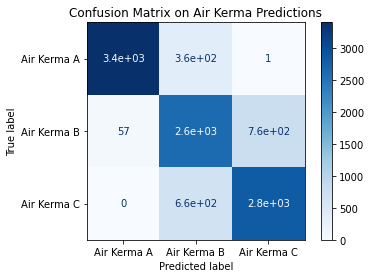

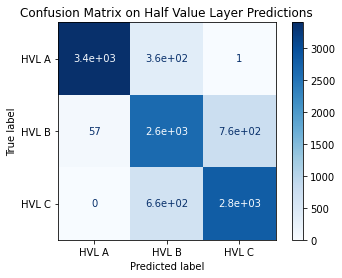

              precision    recall  f1-score   support

 Air Kerma A       0.90      0.98      0.94      3457
 Air Kerma B       0.76      0.72      0.74      3652
 Air Kerma C       0.81      0.79      0.80      3578

    accuracy                           0.83     10687
   macro avg       0.83      0.83      0.83     10687
weighted avg       0.82      0.83      0.82     10687

              precision    recall  f1-score   support

       HVL A       0.90      0.98      0.94      3457
       HVL B       0.76      0.72      0.74      3652
       HVL C       0.81      0.79      0.80      3578

    accuracy                           0.83     10687
   macro avg       0.83      0.83      0.83     10687
weighted avg       0.82      0.83      0.83     10687



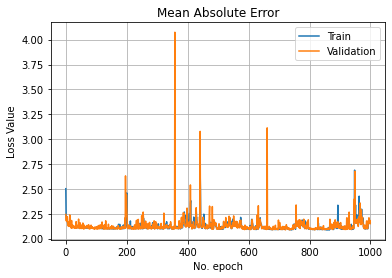

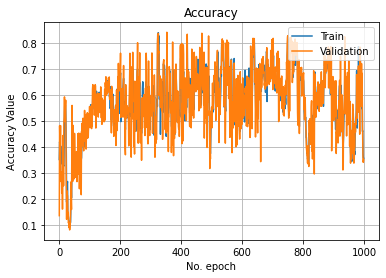

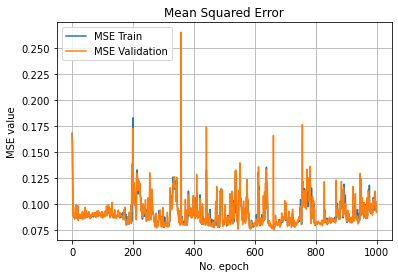

334/334 [==============================] - 0s 1ms/step - loss: 2.1282 - accuracy: 0.3529 - mean_squared_error: 0.0886


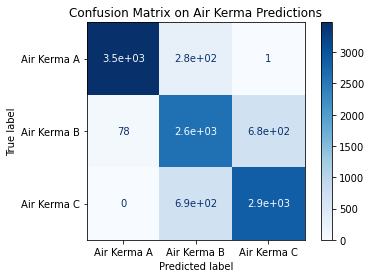

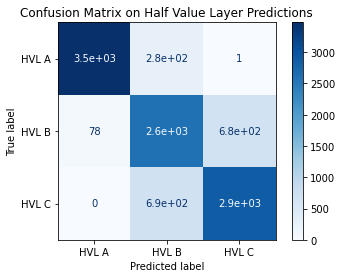

              precision    recall  f1-score   support

 Air Kerma A       0.92      0.98      0.95      3554
 Air Kerma B       0.78      0.73      0.75      3588
 Air Kerma C       0.81      0.81      0.81      3545

    accuracy                           0.84     10687
   macro avg       0.84      0.84      0.84     10687
weighted avg       0.84      0.84      0.84     10687

              precision    recall  f1-score   support

       HVL A       0.92      0.98      0.95      3554
       HVL B       0.78      0.73      0.75      3588
       HVL C       0.81      0.81      0.81      3545

    accuracy                           0.84     10687
   macro avg       0.84      0.84      0.84     10687
weighted avg       0.84      0.84      0.84     10687



In [ ]:
def neural_net(n_layers, inputs, units, activation, output_activation, init_mode):
    if isinstance(units, list):
        assert len(units) == n_layers
    else:
        units = [units] * n_layers
        
    classifier = Sequential()
 
    # Adds first hidden layer with input_dim parameter
    classifier.add(Dense(units = units[0],
                         input_dim = inputs,
                         activation = activation,
                         kernel_initializer = init_mode,
                         name = 'h1'))
    
    # Adds remaining hidden layers
    for i in range(2, n_layers + 1):
        classifier.add(Dense(units = units[i-1], 
                        activation = activation, 
                        kernel_initializer = init_mode, 
                        name = 'h{}'.format(i)))
    
    # Adds output layer
    classifier.add(Dense(units = y_test_folds.shape[1], 
                         activation = output_activation,
                         kernel_initializer=init_mode,
                         name='o'))
 
    # Compiles the model
    classifier.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy', 'mean_squared_error'])
 
    return classifier

scores = []
classification = []

precision_kerma = []
precision_half = []
        
recall_kerma = []
recall_half = []
        
f1_kerma = []
f1_half = []
        
acc_kerma = []
acc_half = []

early_stopping = tf.keras.callbacks.EarlyStopping(patience=300)
KF = KFold(n_splits=10, shuffle=True, random_state=1000)
for train_index, test_index in KF.split(X, y):
    X_train_folds = X[train_index]
    y_train_folds = (y[train_index])
 
    X_test_folds = X[test_index]
    y_test_folds = (y[test_index])
    
    inputs = X_test_folds.shape[1]

    NN = neural_net(n_layers=9, 
                    inputs=inputs, 
                    units=100, 
                    activation='sigmoid', 
                    output_activation='sigmoid',
                    init_mode='glorot_uniform')
 
    Train_NN = NN.fit(X_train_folds, 
                      y_train_folds, 
                      epochs=1000, 
                      validation_split=0.2,
                      callbacks=early_stopping,
                      verbose=0)

    ## For Plotting the Result through each fold 
    plot = plot_result(Train_NN)
    
    ## Evaluate the model using X test and y test that split from the Cross Validation 
    score = NN.evaluate(X_test_folds, y_test_folds)
    scores.append(score)
   
    conf = Conf_Mat(X_test_folds, y_test_folds)

    meas_conf = Measure_Conf_Mat(X_test_folds, y_test_folds)
    
    ## Evaluating Classification after Learning
    # Precision
    prec_kerma = Precision_Classification_Kerma(NN, X_test_folds, y_test_folds)
    precision_kerma.append(prec_kerma)
    
    prec_half =  Precision_Classification_HVL(NN, X_test_folds, y_test_folds)
    precision_half.append(prec_half)

      
    # Recall
    rec_kerma = Recall_Classification_Kerma(NN, X_test_folds, y_test_folds)
    recall_kerma.append(rec_kerma)
    rec_half =  Recall_Classification_HVL(NN, X_test_folds, y_test_folds)
    recall_half.append(rec_half)
            
    # F1-Score
    f1_ker = f1Score_Classification_Kerma(NN, X_test_folds, y_test_folds)
    f1_kerma.append(f1_ker)
    f1_hvl = f1Score_Classification_HVL(NN, X_test_folds, y_test_folds)
    f1_half.append(f1_hvl)
            
    # Accuracy
    accuracy_kerma = Accuracy_Classification_Kerma(NN, X_test_folds, y_test_folds)
    acc_kerma.append(accuracy_kerma)
    accuracy_half = Accuracy_Classification_HVL(NN, X_test_folds, y_test_folds)
    acc_half.append(accuracy_half)

## Evaluation Data
scores = np.asarray(scores)
print('-------------------------------------------------------------------------')
print('TRAINING EVALUATION')
print('-------------------------------------------------------------------------')
Test_Scoring_1 = pd.DataFrame({'Test Loss': scores[:, 0],
                             'Test Accuracy': scores[:, 1], 
                             'Test MSE': scores[:, 2]})
print(Test_Scoring_1)

# **Mengunduh Hasil Pengukuran Performa**

In [ ]:
from google.colab import files

with pd.ExcelWriter('Predict Test Performance Measurement Result.xlsx') as writer:
     Test_Scoring.to_excel(writer, sheet_name='Scoring', index=False)
     Kerma_Classification.to_excel(writer, sheet_name='Confusion Matrix Kerma', index=False)
     Half_Classification.to_excel(writer, sheet_name='Confusion Matrix Half', index=False)
 
files.download('Predict Test Performance Measurement Result.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>